In [1]:
import numpy as np
import urllib
from matplotlib import pyplot as plt

from notebook.services.config import ConfigManager

cm = ConfigManager()
cm.update('livereveal', {
              'theme': 'league',
              'transition': 'fade',
              'center': 'false',
              'overview' : 'true',
              'start_slideshow_at': 'selected'
})

%matplotlib inline

/Users/fgonza/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [16]:
# This example is based on the convnets-keras project:
#     https://github.com/heuritech/convnets-keras

from keras.optimizers import SGD
from convnetskeras.convnets import preprocess_image_batch, convnet
from convnetskeras.imagenet_tool import synset_to_dfs_ids
from keras.backend import image_dim_ordering, set_image_dim_ordering

# Image dimensions ordering should follow the Theano convention
if image_dim_ordering() != 'th':
    set_image_dim_ordering('th')

# Load labels for the 1000 ImageNet classes
with open('labels.txt','r') as labels_file:
    labels = eval(labels_file.read())

# VGG Neural Net Test
[Fabio A. González](http://dis.unal.edu.co/~fgonza/), Universidad Nacional de Colombia


<table style="border:0px">
  <tr>
    <th><img  src="vgg_1.jpg" width="550"></th>
    <th><img  src="vgg_2.jpg" width="550"></th>
  </tr>
</table>


In [17]:
# You must download the file vgg16_weights.h5 from http://files.heuritech.com/weights/vgg16_weights.h5

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model = convnet('vgg_16',weights_path="vgg16_weights.h5", heatmap=False)
model.compile(optimizer=sgd, loss='mse')

In [4]:
model.summary(70)

______________________________________________________________________
Layer (type)           Output Shape   Param # Connected to            
zeropadding2d_1 (ZeroPa(None, 3, 226, 0       zeropadding2d_input_1[0]
______________________________________________________________________
conv1_1 (Convolution2D)(None, 64, 224,1792    zeropadding2d_1[0][0]   
______________________________________________________________________
zeropadding2d_2 (ZeroPa(None, 64, 226,0       conv1_1[0][0]           
______________________________________________________________________
conv1_2 (Convolution2D)(None, 64, 224,36928   zeropadding2d_2[0][0]   
______________________________________________________________________
maxpooling2d_1 (MaxPool(None, 64, 112,0       conv1_2[0][0]           
______________________________________________________________________
zeropadding2d_3 (ZeroPa(None, 64, 114,0       maxpooling2d_1[0][0]    
______________________________________________________________________
conv2_

In [5]:
def pp_prediction(pred):
    return sorted([(p, labels[i]) for i, p in enumerate(pred)], reverse = True)[:5]
    

## Predict image label

In [8]:
#urllib.urlretrieve("https://yt3.ggpht.com/-i4gGqLWlYQs/AAAAAAAAAAI/AAAAAAAAAAA/Vj0B9SlZfmA/s900-c-k-no-mo-rj-c0xffffff/photo.jpg",
#                   "test.jpg")

<img  src="test.jpg" width="250">

In [9]:
im = preprocess_image_batch(['test.jpg'],img_size=(256,256), crop_size=(224,224), color_mode="bgr")
out = model.predict(im)[0]
pp_prediction(out)

[(0.54457611, 'Egyptian cat'),
 (0.19895379, 'tabby, tabby cat'),
 (0.074247167, 'tiger cat'),
 (0.066990294, 'bow tie, bow-tie, bowtie'),
 (0.017169455, 'suit, suit of clothes')]

## Concept Heatmap

In [10]:
# Reload model with heatmap activated
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model2 = convnet('vgg_16',weights_path="vgg16_weights.h5", heatmap=True)
model2.compile(optimizer=sgd, loss='mse')

In [11]:
# Process input image
im = preprocess_image_batch(['test.jpg'], color_mode="bgr")
out = model2.predict(im)

## Heatmap for Egyptian cat

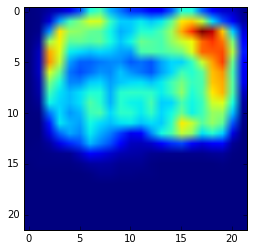

In [12]:
s = 'n02124075' # Egyptian cat synset ID
ids = synset_to_dfs_ids(s)
heatmap = out[0,ids].sum(axis=0)
plt.imshow(heatmap)

## Heatmap for Domestic cat (more general concept)

[285, 283, 282, 284, 281]


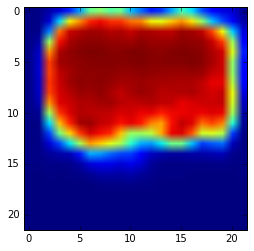

In [13]:
s = 'n02121808' # Egyptian cat synset ID
ids = synset_to_dfs_ids(s)
print(ids)
heatmap = out[0,ids].sum(axis=0)
plt.imshow(heatmap)

## Heatmap for Neckwear

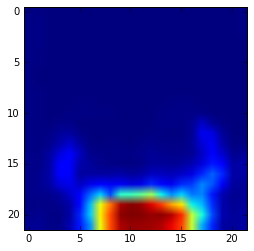

In [14]:
s = 'n03816005' # Neckwear synset ID
ids = synset_to_dfs_ids(s)
heatmap = out[0,ids].sum(axis=0)
plt.imshow(heatmap)

## Heatmap for Clothing

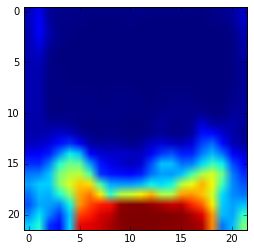

In [15]:
s = 'n03051540' # Suit synset ID
#s = "n02503517"
ids = synset_to_dfs_ids(s)
heatmap = out[0,ids].sum(axis=0)
plt.imshow(heatmap)